In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
training_data = pd.read_csv('data_1.csv')
training_data = training_data.loc[:, training_data.columns != 'Unnamed: 0']
training_data.head()

,M,%NecONG,%NecRO,%NecRA,%VolONG,%VolRO,%VolRA,SuONG,SuRO,VisONG,...,F23,F24,F25,F26,F27,F28,F29,F30,F31,%Comp
0,2,0.690000,0.690000,0.690000,0.545455,0.545455,0.545455,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.726027
1,2,0.570000,0.570000,0.613300,0.500000,0.500000,0.603175,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.595745
2,2,0.603448,0.603448,0.110645,0.687500,0.687500,0.477273,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0.815789
3,2,0.650000,0.650000,0.613300,0.750000,0.750000,0.603175,0,0,0.0,...,1,0,0,0,0,0,0,0,0,0.590909
4,3,0.683333,0.627389,0.613300,0.833333,0.666667,0.603175,0,3,0.0,...,0,0,0,0,0,0,0,1,0,0.656250


In [4]:
M = training_data.sample(frac=1) # Random
Mtrain, Mtest = train_test_split(M, test_size=0.25)
print("Training shape: " + str(Mtrain.shape) + ". Test shape: " + str(Mtest.shape))

Training shape: (27, 60). Test shape: (10, 60)


In [27]:
y = pd.DataFrame()
y["pred"] = M["%Comp"]
training_data = M.drop(["%Comp"], axis=1)

#parameters = { 
#    'C': np.linspace(0.1, 1.2, num=5) #,
    #'epsilon': np.linspace(0.01, 0.3, num=5)
#}
#svr = GridSearchCV(SVR(), cv=2, param_grid=parameters)

svr = SVR(epsilon=0.01)
svr.fit(training_data, y)

#save_model_fecha_regressor(svr, features)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.01,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [28]:
training_error = mean_squared_error(M['%Comp'], 
                                    svr.predict(M.loc[:, M.columns != '%Comp']))
test_error = mean_squared_error(Mtest['%Comp'], 
                                    svr.predict(Mtest.loc[:, Mtest.columns != '%Comp']))
print('RSME en datos de entrenamiento: ' + str(training_error))
print('RSME en datos de prueba: ' + str(test_error))

RSME en datos de entrenamiento: 0.0016631476813494944
RSME en datos de prueba: 0.005909009161978783


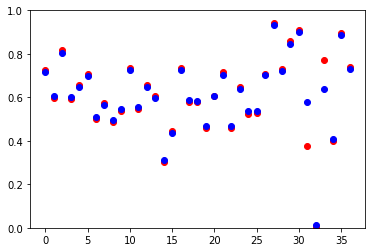

In [29]:
%matplotlib inline
f, ax = plt.subplots(1)
plt.plot(M.index.values, M['%Comp'], 'ro', 
         M.index.values, svr.predict(M.loc[:, M.columns != '%Comp']), 'bo')
ax.set_ylim(ymin=0, ymax=1)
plt.show(f)

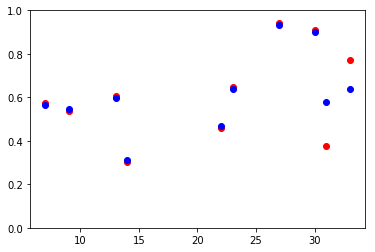

In [30]:
f, ax = plt.subplots(1)
ax.plot(Mtest.index.values, Mtest['%Comp'], 'ro', 
         Mtest.index.values, svr.predict(Mtest.loc[:, Mtest.columns != '%Comp']), 'bo')
ax.set_ylim(ymin=0, ymax=1)
plt.show(f)

In [31]:
forest=RandomForestRegressor()#(n_estimators=30)
forest.fit(M.loc[:, Mtest.columns != '%Comp'], M['%Comp'])
table=pd.concat((pd.DataFrame(M.iloc[:, 0:].columns, columns = ['variable']), 
           pd.DataFrame(forest.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20].reset_index()
table=table.drop("index",axis=1)
table=table.groupby([table.variable.str[:]]).sum().reset_index().sort_values(by='importance',ascending=False).reset_index()
table=table.drop("index",axis=1)
table.head()

,variable,importance
0,Dias,0.192136
1,%NecRO,0.137803
2,%NecONG,0.130367
3,%VolONG,0.089440
4,Dis,0.064974


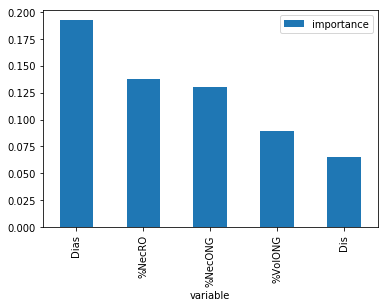

In [32]:
table.head().plot.bar(x='variable')